# 👋 Welcome to the Elastic{ON} Demo of Eland!

The Elasticsearch cluster being used for this demo is [hosted on Elastic Cloud](https://cloud.elastic.co)
and this Jupyter Notebook is [hosted by Binder](https://mybinder.org).

**If you have any questions during the live Q&A about Eland or this demo ask within the Q&A section!**

## Resources

### ➤ [Eland Documentation (eland.readthedocs.io)](https://eland.readthedocs.io)
### ➤ [Eland Source Code on GitHub](https://github.com/elastic/eland)
### ➤ [Jupyter Notebook Source Code](https://github.com/sethmlarson/eland-binder-demo)
### ➤ [NYC OpenData Restaurant Inspection Results](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j)

## Installing

Eland is available on [PyPI](https://pypi.org/project/eland) with Pip:

```
$ python -m pip install eland
```

and on [Conda Forge](https://anaconda.org/conda-forge/eland):

```
$ conda install -c conda-forge eland
```

## Getting Started

This Jupyter Notebook works like any other Jupyter Notebook, you can simply browse the already completed results or you can try things out yourself by modifying a code block and hitting "Run". The Elasticsearch cluster in Elastic Cloud will respond with new results.

If you're unfamiliar with Jupyter Notebooks there's a [quickstart guide available](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook).

Our Elasticsearch cluster is already pre-loaded with the NYC OpenData Restaurant Inspection Results dataset in the `nyc-restaurants` index which includes a good mix of data types that we can use including text, integers, floating point, locations, and dates.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import eland as ed
from elasticsearch import Elasticsearch

## Creating a Connection to Elasticsearch

Our Elasticsearch instance is running in [Elastic Cloud](https://www.elastic.co/cloud)
and uses an [API Key](https://www.elastic.co/guide/en/kibana/master/api-keys.html)
configured to be read only with access to the `nyc-restaurants` index.

In [2]:
es = Elasticsearch(
  cloud_id="eland-binder:dXMtZWFzdDEuZ2NwLmVsYXN0aWMtY2xvdWQuY29tJDZlMDllNWE4NzU4NzQxMjliMDEzZDdhMmYwMmNiNWNhJDVlYTYwMjM0OThlOTRmMzBiNGZiOTZmYWY2MWJiMjU5",
  api_key=("M8xPjnQBvi72UTXObMKb", "ARmi0-MKRb-cW75rGhv8YA")
)

Now we can create an [`eland.DataFrame`](https://eland.readthedocs.io/en/latest/reference/dataframe.html) from the `nyc-restaurants` index:

In [3]:
df = ed.DataFrame(
  es, es_index_pattern="nyc-restaurants",
)

## Exploring the Dataset

You can explore a DataFrame in Eland the same way you would a Pandas DataFrame. If we just look at the `df` instance we receive:

In [4]:
df

,action,boro,building,census_tract,community_board,council_district,critical_flag,cuisine_description,grade,grade_date,...,inspection_type,location,name,phone,record_date,score,street,violation_code,violation_description,zipcode
hckkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Brooklyn,252,32900,309,40,False,Jewish/Kosher,A,2020-01-29,...,Cycle Inspection / Initial Inspection,"[-73.953415555946, 40.663740745425]",GRUIT,3478460622,2020-09-14,7.0,EMPIRE BOULEVARD,10F,Non-food contact surface improperly constructe...,11225
hskkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Bronx,394,51600,210,13,False,Italian,A,2018-07-31,...,Cycle Inspection / Initial Inspection,"[-73.78734583163201, 40.849516303236]",ARTIE'S,7188859885,2020-09-14,6.0,CITY ISLAND AVENUE,10F,Non-food contact surface improperly constructe...,10464
h8kkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Manhattan,1158,5800,105,2,True,Japanese,A,2018-11-19,...,Cycle Inspection / Re-inspection,"[-73.98851294715101, 40.744481575862004]",CHIKARASHI,9172620623,2020-09-14,12.0,BROADWAY,04L,Evidence of mice or live mice present in facil...,10001
iMkkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Bronx,3218,14100,203,17,True,Chinese,A,2017-05-22,...,Cycle Inspection / Re-inspection,"[-73.909117939035, 40.823335867465]",NEW PANDA RESTAURANT,7182928628,2020-09-14,11.0,3 AVENUE,02B,Hot food item not held at or above 140º F.,10451
ickkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Brooklyn,1875,83000,317,45,False,Sandwiches,A,2019-02-25,...,Cycle Inspection / Initial Inspection,"[-73.948380677069, 40.639773910201995]",SUBWAY,6464841708,2020-09-14,4.0,NOSTRAND AVENUE,10B,Plumbing not properly installed or maintained;...,11226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
y8wljnQBvi72UTXOr5xn,Violations were cited in the following area(s).,Queens,41-19,40500,404,21,True,"Latin (Cuban, Dominican, Puerto Rican, South &...",A,2017-04-26,...,Cycle Inspection / Initial Inspection,"[-73.863190119263, 40.748438132474]",EL POLLO PERUANO,7184575130,2020-09-14,11.0,NATIONAL STREET,04N,Filth flies or food/refuse/sewage-associated (...,11368
z8wljnQBvi72UTXOr5xn,Violations were cited in the following area(s).,Queens,4211,40500,404,21,False,Spanish,A,2018-11-19,...,Cycle Inspection / Re-inspection,"[-73.863036820562, 40.747521198162]",LA ESPIGA RESTAURANT AND BAKERY,7187797898,2020-09-14,13.0,102ND ST,08A,Facility not vermin proof. Harborage or condit...,11368
zMwljnQBvi72UTXOr5xn,Violations were cited in the following area(s).,Queens,10928,25800,412,27,False,Pizza,A,2017-09-20,...,Pre-permit (Operational) / Initial Inspection,"[-73.783731035692, 40.696744291047004]",PAPA JOHN'S PIZZA,5165743314,2020-09-14,12.0,MERRICK BLVD,08A,Facility not vermin proof. Harborage or condit...,11433
zcwljnQBvi72UTXOr5xn,Violations were cited in the following area(s).,Queens,10014,37700,403,21,True,Spanish,A,2018-10-15,...,Cycle Inspection / Re-inspection,"[-73.86822516095, 40.757348037797996]",EL MALECON RESTAURANT,7184460031,2020-09-14,10.0,NORTHERN BLVD,06C,Food not protected from potential source of co...,11368


Looks just like a pandas DataFrame! Let's look closer:

In [5]:
df.info()

<class 'eland.dataframe.DataFrame'>
Index: 193778 entries, hckkjnQBvi72UTXObqpX to z8wljnQBvi72UTXOr5xn
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   action                 193778 non-null  object        
 1   boro                   193778 non-null  object        
 2   building               193778 non-null  object        
 3   census_tract           193778 non-null  int64         
 4   community_board        193778 non-null  int64         
 5   council_district       193778 non-null  int64         
 6   critical_flag          193778 non-null  bool          
 7   cuisine_description    193778 non-null  object        
 8   grade                  193778 non-null  object        
 9   grade_date             193778 non-null  datetime64[ns]
 10  inspection_date        193778 non-null  datetime64[ns]
 11  inspection_type        193778 non-null  object        
 12  location          

## All Data Stored in Elasticsearch

Looks like there are almost 200,000 rows in this dataset.

An interesting point you can see from this display is that the local memory being used is unexpected small for 200,000 rows! That's because very little data in stored in memory. **All the data is stored in Elasticsearch until queried.**

The size of the dataset in Elasticsearch is **64 MB** when only including primary shards:

```
$ curl -X GET /nyc-restaurants/_stats/store

"nyc-restaurants": {
  "primaries": {
    "store": {
      "reserved_in_bytes": 0,
      "size_in_bytes": 67672493
    }
  }
...
```

## Mapping Data Types from Elasticsearch to Pandas

Eland maps [Elasticsearch Field datatypes](https://www.elastic.co/guide/en/elasticsearch/reference/current/mapping-types.html) into [datatypes understood by pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes).

We can see the mapping between the two dtypes nicely by joining the
traditional `DataFrame.dtypes` series with `DataFrame.es_dtypes` to show
what types are being used within Elasticsearch:

In [6]:
pd_dtypes = df.dtypes.rename("pandas")
es_dtypes = df.es_dtypes.rename("Elasticsearch")

pd_dtypes.to_frame().join(es_dtypes)

,pandas,Elasticsearch
action,object,keyword
boro,object,keyword
building,object,keyword
census_tract,int64,long
community_board,int64,long
council_district,int64,long
critical_flag,bool,boolean
cuisine_description,object,text
grade,object,keyword
grade_date,datetime64[ns],date


## Retrieving Data from Elasticsearch

Here we ask for the first 5 entries via the `head()` method. Data still hasn't been permanently pulled out of Elasticsearch yet, to do that we use `to_pandas()`, but be careful, we don't want to dump all the data from our cluster all at once.

In [7]:
# Still an Eland DataFrame:
head_df = df.head(5)
print(type(head_df))

head_df

<class 'eland.dataframe.DataFrame'>


,action,boro,building,census_tract,community_board,council_district,critical_flag,cuisine_description,grade,grade_date,...,inspection_type,location,name,phone,record_date,score,street,violation_code,violation_description,zipcode
hckkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Brooklyn,252,32900,309,40,False,Jewish/Kosher,A,2020-01-29,...,Cycle Inspection / Initial Inspection,"[-73.953415555946, 40.663740745425]",GRUIT,3478460622,2020-09-14,7.0,EMPIRE BOULEVARD,10F,Non-food contact surface improperly constructe...,11225
hskkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Bronx,394,51600,210,13,False,Italian,A,2018-07-31,...,Cycle Inspection / Initial Inspection,"[-73.78734583163201, 40.849516303236]",ARTIE'S,7188859885,2020-09-14,6.0,CITY ISLAND AVENUE,10F,Non-food contact surface improperly constructe...,10464
h8kkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Manhattan,1158,5800,105,2,True,Japanese,A,2018-11-19,...,Cycle Inspection / Re-inspection,"[-73.98851294715101, 40.744481575862004]",CHIKARASHI,9172620623,2020-09-14,12.0,BROADWAY,04L,Evidence of mice or live mice present in facil...,10001
iMkkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Bronx,3218,14100,203,17,True,Chinese,A,2017-05-22,...,Cycle Inspection / Re-inspection,"[-73.909117939035, 40.823335867465]",NEW PANDA RESTAURANT,7182928628,2020-09-14,11.0,3 AVENUE,02B,Hot food item not held at or above 140º F.,10451
ickkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Brooklyn,1875,83000,317,45,False,Sandwiches,A,2019-02-25,...,Cycle Inspection / Initial Inspection,"[-73.948380677069, 40.639773910201995]",SUBWAY,6464841708,2020-09-14,4.0,NOSTRAND AVENUE,10B,Plumbing not properly installed or maintained;...,11226


In [8]:
# Now we're a pandas DataFrame:
pd_df = head_df.to_pandas()
print(type(pd_df))

pd_df

<class 'pandas.core.frame.DataFrame'>


,action,boro,building,census_tract,community_board,council_district,critical_flag,cuisine_description,grade,grade_date,...,inspection_type,location,name,phone,record_date,score,street,violation_code,violation_description,zipcode
hckkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Brooklyn,252,32900,309,40,False,Jewish/Kosher,A,2020-01-29,...,Cycle Inspection / Initial Inspection,"[-73.953415555946, 40.663740745425]",GRUIT,3478460622,2020-09-14,7.0,EMPIRE BOULEVARD,10F,Non-food contact surface improperly constructe...,11225
hskkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Bronx,394,51600,210,13,False,Italian,A,2018-07-31,...,Cycle Inspection / Initial Inspection,"[-73.78734583163201, 40.849516303236]",ARTIE'S,7188859885,2020-09-14,6.0,CITY ISLAND AVENUE,10F,Non-food contact surface improperly constructe...,10464
h8kkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Manhattan,1158,5800,105,2,True,Japanese,A,2018-11-19,...,Cycle Inspection / Re-inspection,"[-73.98851294715101, 40.744481575862004]",CHIKARASHI,9172620623,2020-09-14,12.0,BROADWAY,04L,Evidence of mice or live mice present in facil...,10001
iMkkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Bronx,3218,14100,203,17,True,Chinese,A,2017-05-22,...,Cycle Inspection / Re-inspection,"[-73.909117939035, 40.823335867465]",NEW PANDA RESTAURANT,7182928628,2020-09-14,11.0,3 AVENUE,02B,Hot food item not held at or above 140º F.,10451
ickkjnQBvi72UTXObqpX,Violations were cited in the following area(s).,Brooklyn,1875,83000,317,45,False,Sandwiches,A,2019-02-25,...,Cycle Inspection / Initial Inspection,"[-73.948380677069, 40.639773910201995]",SUBWAY,6464841708,2020-09-14,4.0,NOSTRAND AVENUE,10B,Plumbing not properly installed or maintained;...,11226


## Filtering Rows in a Data Frame

You can apply filters to our data frame in the same way that you can with Pandas. Here we're filtering for rows which are in the 'Staten Island' borough, with a 'True' `critical_flag`, and a `grade` that's either 'C' or 'N'.
Then we filter the data frame to only include the columns `name`, `boro`, `critical_flag`, and `grade`:

In [9]:
df[
  (df.boro == "Staten Island")
  & (df.critical_flag == True)
  & df.grade.isin(("C", "N"))
].filter(
  ["name", "boro", "critical_flag", "grade"]
).head(5)

,name,boro,critical_flag,grade
BMkkjnQBvi72UTXObqxX,EAST PACIFIC,Staten Island,True,C
ickkjnQBvi72UTXOcrUH,BOOTLEG MANNINGS,Staten Island,True,C
xckkjnQBvi72UTXOhuew,AMENDMENT 18 (entrance on Dock Street),Staten Island,True,C
WckkjnQBvi72UTXOh-pc,PRECIOUS ISLAND TEA SHOP,Staten Island,True,C
G8kkjnQBvi72UTXOeMjB,LIBERTY TAVERN,Staten Island,True,C


## Aggregations with Eland

Eland supports many Pandas aggregations including min, mean, median, max, var, std, count, nunique, sum, and mad.

Aggregations are mapped to Elasticsearch aggs and then unpacked into a Pandas DataFrame or Series.

Read more about [`eland.DataFrame.agg()`](https://eland.readthedocs.io/en/latest/reference/api/eland.DataFrame.agg.html#eland.DataFrame.agg)

In [10]:
df[["score", "census_tract", "critical_flag", "grade_date"]].agg(["min", "mean", "median", "max", "var", "std"])

,score,census_tract,critical_flag,grade_date
min,-1.000000,1.000000e+02,False,2014-04-21 00:00:00.000000000
mean,12.897687,2.884426e+04,0.505584,2018-09-19 15:25:13.620741211
median,12.000000,1.604200e+04,True,2018-10-25 03:23:23.130271484
max,99.000000,1.621000e+05,True,2020-03-16 00:00:00.000000000
var,66.464938,9.435058e+08,0.249969,NaT
std,8.152635,3.071666e+04,0.499971,NaT


In [11]:
df.grade.value_counts()

A    154761
B     25408
C      9586
P      2388
Z      1622
N         7
G         6
Name: grade, dtype: int64

## Visualizations via Matplotlib

You can create simple histograms of your data:

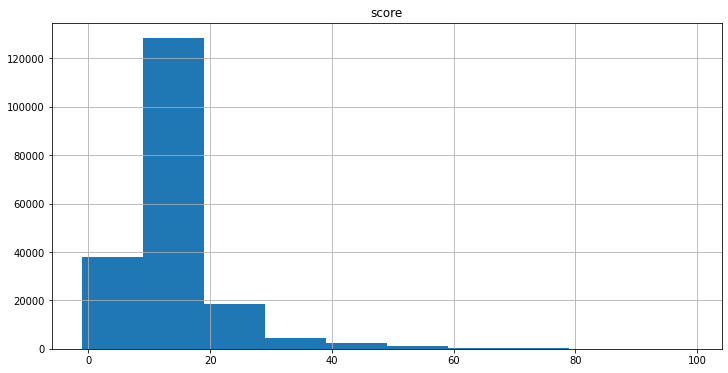

In [12]:
df[["score"]].hist(figsize=(12, 6))
plt.show()

## Machine Learning

Since this is a read-only cluster you can't upload your own models
however I can show you how an existing model on the cluster was
trained.

More information on [Machine Learning in Eland](https://eland.readthedocs.io/en/latest/reference/ml.html)

For this Machine Learning demo we use the scikit-learn [`wine` classifier dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
and a [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) model. Full list of supported model types available in the Machine Learning docs for Eland.

### Import Scikit-Learn and Train Model Locally

```python
>>> from sklearn import datasets
>>> from sklearn.tree import DecisionTreeClassifier

>>> digits = datasets.load_wine()
>>> print("Feature Names:", digits.feature_names)
Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

>>> print("Data example:", digits.data[0])
Data example: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]

# Save 10, 80, and 140 for testing our model
>>> data = [x for i, x in enumerate(digits.data) if i not in (10, 80, 140)]
>>> target = [x for i, x in enumerate(digits.target) if i not in (10, 80, 140)]

# Fit the other data to a DecisionTreeClassifier
>>> sk_classifier = DecisionTreeClassifier()
>>> sk_classifier.fit(data, target)
```

### Test the Locally Trained Model

```python
>>> print(sk_classifier.predict(digits.data[[10, 80, 140]]))
[0 1 2]

>>> print(digits.target[[10, 80, 140]])
[0 1 2]
```

### Serialize the Scikit-Learn Model into Elasticsearch

```python
>>> from eland.ml import MLModel

>>> es_classifier = MLModel.import_model(
...     es_client=es,
...     model_id="wine-classifier",
...     model=sk_classifier,
...     feature_names=digits.feature_names,
...     es_if_exists="replace"
>>> )
```

### Run the Model in Elasticsearch!

```python
>>> print(es_classifier.predict(digits.data[[10, 80, 140]]))
[0 1 2]

# Tada!
```

## What's Coming Next?

Eland is open sourced on GitHub and if [you're interested in helping build new features](https://github.com/elastic/eland/issues?q=is%3Aissue+is%3Aopen+label%3A%22good+first+issue%22) we'd love to have you!

Here's a list of features that are coming soon to Eland:

#### – Native [Full-Text Search](https://www.elastic.co/guide/en/elasticsearch/reference/current/full-text-queries.html) with `DataFrame.es_match()`

#### – Native [Geo-spatial Queries](https://www.elastic.co/guide/en/elasticsearch/reference/current/geo-queries.html) and Integration with [Geopandas](https://geopandas.org/)

#### – Aggregate and Visualize Time-Series Data

#### – Pivoted Aggregations with `DataFrame.groupby()`